### Pandas, veri manipülasyonu kütüphanesidir. Veri analizi ve manipülasyonu için kullanılan popüler bir phyton kütüphanesidir. 
### Temel bilgiler ie şu şekildedir: Pandas 2 ana veri yapısı sunar. Series: Tek boyutlu etiketli diziler. DataFrame: 2 boyutlu, boyutları değiştirilebilir, etiketli veri yapıları. Veri Manipülasyonu: Verileri filtreleyebilir, gruplandırabilir, birleştirebilir ve dönüştürülebilir. Zaman Serileri: Zaman damgaları ile çalışmak için güçlü araçlar sağlar. Dosya içi-Dışarı aktarma: CSV, Excel, SQL ve diğer formatlardan veri okuyabilir ve yazabilirsiniz. Kullanım alanları veri temizleme: Eksik verileri doldurma, aykırı değerleri tespit etme. Veri analizi: Temel istatistiksel analizler ve veri görselleştirme. Makine öğrenimi: Veri ön işleme aşamalarında sıklıkla kullanılır.


In [4]:
#Kurulu değilse
#pip install pandas

In [29]:
import pandas as pd

In [31]:
pd.__version__

'2.1.4'

In [33]:
#pip install - upgrade pandas
#pip install - upgrade numpy
## pip install pandas - 2.1.4 # Bazen çalıştırdığımız projelerde belirli bir versiyon kullanılmış olabilir.
## kurulu değilse güncel versiyonunu kurar, kuruluysada günceller.

### Seriler/Series

In [36]:
#Listelerde seri oluşturma
isimler=pd.Series(['Ali', 'Veli', 'İrem', 'Murat'])
isimler

0      Ali
1     Veli
2     İrem
3    Murat
dtype: object

In [38]:
type(isimler)

pandas.core.series.Series

In [40]:
#İndex numarası 2 olan kişiyi yazdırır.
isimler[2]

'İrem'

In [42]:
#ilk 2 kişiyi yazdırır.
isimler[0:2]

0     Ali
1    Veli
dtype: object

In [44]:
#A ile başlayanları gösterelim
isimler[isimler.str.startswith('A')]

0    Ali
dtype: object

In [46]:
isimler = pd.concat([isimler, pd.Series(['Ayla'])], ignore_index=True)
isimler[isimler.str.startswith('A')]

0     Ali
4    Ayla
dtype: object

In [52]:
#isimleri küçük harfe çevirme
isimler=isimler.str.lower()
isimler

0      ali
1     veli
2    i̇rem
3    murat
4     ayla
dtype: object

In [74]:
import numpy as np

In [76]:
isimler=np.array(['Ali', 'Veli'])
#isimler=isimler.str.lover() kullanılmaz
isimler=np.char.lower(isimler)
isimler

array(['ali', 'veli'], dtype='<U4')

In [78]:
#Hangi ögeden kaç tane var.
iller=pd.Series(['Adana', 'Adana', 'Antalya', 'Adana', 'Ankara', 'İstanbul', 'İzmir', 'İstanbul'])
(iller=='Adana').sum()

3

In [80]:
#Tekrarlayan değerleri 1 defa alır
iller.unique()

array(['Adana', 'Antalya', 'Ankara', 'İstanbul', 'İzmir'], dtype=object)

In [82]:
#Kaç farklı ilden katılımcı var?
iller.nunique()

5

In [84]:
#Ana kodumuzda kaç tane şehir varsa onu gösterir.
iller.value_counts()

Adana       3
İstanbul    2
Antalya     1
Ankara      1
İzmir       1
Name: count, dtype: int64

In [90]:
takimlar=pd.Series(["Fenerbahçe", "Beşiktaş", "Trabzonspor", "Galatasaray", "Fenerbahçe","Galatasaray", "Trabzonspor", "Galatasaray", "Fenerbahçe", "Beşiktaş", "Fenerbahçe"])

In [92]:
takimlar.value_counts()

Fenerbahçe     4
Galatasaray    3
Beşiktaş       2
Trabzonspor    2
Name: count, dtype: int64

In [98]:
#Her bir değerin eşit olup olmadığını kontrol eder, sadece Fenerbahçe için*
takimlar.isin(['Fenerbahçe'])

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10     True
dtype: bool

In [100]:
puanlar=pd.Series([50,70,90,100,70,50,80,90,100,80])
len(puanlar)

10

In [102]:
#Ortalama
puanlar.mean()

78.0

In [106]:
#median,bir veri setinde ya da belirtilen sayı kümesinde yer alan ortanca değeri verir.
puanlar.median()

80.0

In [108]:
#Standart sapma
puanlar.std()

18.135294011647257

In [110]:
#Puanlar arasında belirli bir puanı filtrelemek için:
puanlar[puanlar>70]

2     90
3    100
6     80
7     90
8    100
9     80
dtype: int64

In [112]:
#Her bir değerden 10 puan düşür.
puanlar_eksi=puanlar-10
puanlar_eksi

0    40
1    60
2    80
3    90
4    60
5    40
6    70
7    80
8    90
9    70
dtype: int64

In [120]:
#Zaman indexli bir seri oluşturma
#Zaman serisi analizlerinde kullanmak için
uretim_miktarlari=pd.Series([100,200,300,400],  index=['p1', 'p2', 'p3', 'p4'])
uretim_miktarlari

p1    100
p2    200
p3    300
p4    400
dtype: int64

In [122]:
#1 yıllık üretimi periyodik olarak 3'er aylık gösterimi
uretim_miktarlari.sum()

1000

In [124]:
#Tarih saatli bir örnek
import datetime
tarihler=pd.date_range("2024-01-01", periods=8,freq='M')
#Belirli bir tarih aralığında, belirli bir frekansta tarihler oluşturur.
uretim=pd.Series([100,200,300,100,200,100,700,800], index=tarihler)
uretim

2024-01-31    100
2024-02-29    200
2024-03-31    300
2024-04-30    100
2024-05-31    200
2024-06-30    100
2024-07-31    700
2024-08-31    800
Freq: M, dtype: int64

<Axes: >

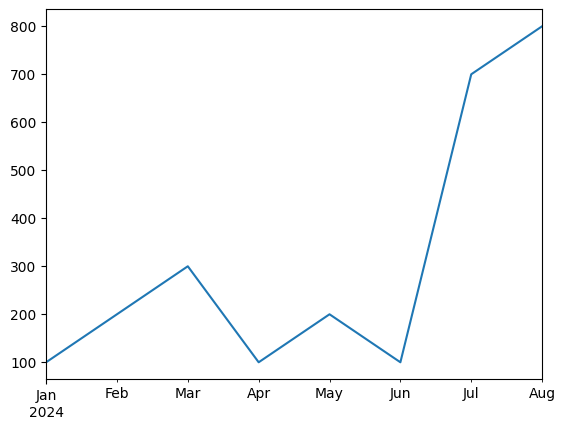

In [128]:
#2 boyutlu grafik oluşturmak için kullanılır.
uretim.plot()

In [130]:
#Sözlükten tanımlama
puanlar=pd.Series({'İrem':99,
                  'Murat':96,
                  'Ali':80})
puanlar

İrem     99
Murat    96
Ali      80
dtype: int64

In [132]:
puanlar.index

Index(['İrem', 'Murat', 'Ali'], dtype='object')

In [136]:
#Data Frame, tablo şeklinde düzenli görmemizi sağlar.
df=pd.DataFrame({'Ad':['İrem', 'Murat', 'Ali', 'Veli', 'Burhan', 'Orhan', 'Elif'],
                'Cinsiyet':['K','E','E','E','E','E','K'],
                'Puan':[90,80,70,60,80,70,100]})
df

,Ad,Cinsiyet,Puan
0,İrem,K,90
1,Murat,E,80
2,Ali,E,70
3,Veli,E,60
4,Burhan,E,80
5,Orhan,E,70
6,Elif,K,100


In [138]:
#Sütun adı
df['Ad']

0      İrem
1     Murat
2       Ali
3      Veli
4    Burhan
5     Orhan
6      Elif
Name: Ad, dtype: object

In [140]:
type(df['Ad'])

pandas.core.series.Series

In [144]:
#Data Frameden baştaki 5 tanesini gösterir.
df.head()

,Ad,Cinsiyet,Puan
0,İrem,K,90
1,Murat,E,80
2,Ali,E,70
3,Veli,E,60
4,Burhan,E,80


In [146]:
#Sondan 5 tanesini gösterir.
df.tail()

,Ad,Cinsiyet,Puan
2,Ali,E,70
3,Veli,E,60
4,Burhan,E,80
5,Orhan,E,70
6,Elif,K,100


In [150]:
#info komutu, çok sayfalı belgeleri döküman olarak görüntülemeye yarayan araçtır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ad        7 non-null      object
 1   Cinsiyet  7 non-null      object
 2   Puan      7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [152]:
df.describe()

,Puan
count,7.000000
mean,78.571429
std,13.451854
min,60.000000
25%,70.000000
50%,80.000000
75%,85.000000
max,100.000000


In [156]:
#Belirlediğimiz kısımdaki satırı gösterir
df[0:1]

,Ad,Cinsiyet,Puan
0,İrem,K,90


In [158]:
df[0:2]

,Ad,Cinsiyet,Puan
0,İrem,K,90
1,Murat,E,80


In [162]:
#Sadece ad sütununu ve 2 satırı alır.
df['Ad'][0:2]

0     İrem
1    Murat
Name: Ad, dtype: object

In [166]:
#Genel uzunluğu verir.
len(df)

7

In [168]:
df['Ad']=df['Ad'].str.lower()
df['Ad']

0     i̇rem
1     murat
2       ali
3      veli
4    burhan
5     orhan
6      elif
Name: Ad, dtype: object